# Import for Data Cleaning and Visualization

In [1]:
#Data Cleaning
import pandas as pd
import numpy as np

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing the Data
df = pd.read_csv('NYC-Airbnb-2023.csv')
df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13668\1517299492.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NYC-Airbnb-2023.csv')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1,NaN
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,365,0,NaN
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.72,1,0,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,2023-02-19,3.41,1,106,52,NaN
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1,NaN


In [3]:
# Shape of Data
df.shape

(42931, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42931 entries, 0 to 42930
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              42931 non-null  int64  
 1   name                            42919 non-null  object 
 2   host_id                         42931 non-null  int64  
 3   host_name                       42926 non-null  object 
 4   neighbourhood_group             42931 non-null  object 
 5   neighbourhood                   42931 non-null  object 
 6   latitude                        42931 non-null  float64
 7   longitude                       42931 non-null  float64
 8   room_type                       42931 non-null  object 
 9   price                           42931 non-null  int64  
 10  minimum_nights                  42931 non-null  int64  
 11  number_of_reviews               42931 non-null  int64  
 12  last_review                     

# Data Cleaning

In [5]:
#Dropping host_id, id, and license because they are not needed
drop_col = ['host_id', 'id', 'license']
df = df.drop(columns = drop_col)
df.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1
1,BlissArtsSpace!,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,365,0
2,Cozy Clean Guest Room - Family Apt,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.72,1,0,0
3,Large Furnished Room Near B'way,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,2023-02-19,3.41,1,106,52
4,"Large Sunny Brooklyn Duplex, Patio + Garden",Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1


In [6]:
#Filling the NaN values with mode
df.reviews_per_month.mode()

0    0.02
Name: reviews_per_month, dtype: float64

In [7]:
df.reviews_per_month = df.reviews_per_month.fillna(0.02)

In [8]:
df.isna().sum()

name                                 12
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10304
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
dtype: int64

# Handling Duplicate Values

In [9]:
df.duplicated().any()

True

In [10]:
#Checking the number of duplicate rows
df[df.duplicated()].shape

(10, 15)

In [11]:
df = df.drop_duplicates()

In [12]:
df.shape

(42921, 15)

# Handing the Datatypes

In [13]:
df.dtypes

name                               object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

In [14]:
df['last_review'].unique()

array(['2022-06-21', '2019-12-02', '2017-07-21', ..., '2022-02-23',
       '2022-03-10', '2022-03-18'], dtype=object)

In [15]:
#Converting object to datetime64[ns]
df['last_review'] = pd.to_datetime(df['last_review'])

In [16]:
#Creating the 'year' column for analysis
df['year'] = df['last_review'].dt.year
df['year'].unique()

array([2022., 2019., 2017., 2023., 2021.,   nan, 2020., 2011., 2013.,
       2014., 2018., 2016., 2015., 2012.])

In [17]:
#Year in float because of NaN values
df.dtypes

name                                      object
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
year                                     float64
dtype: object

In [18]:
df.drop(columns = 'last_review', axis = 1)

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,year
0,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,150,30,49,0.30,3,314,1,2022.0
1,BlissArtsSpace!,Garon,Brooklyn,Bedford-Stuyvesant,40.685350,-73.955120,Private room,60,30,50,0.30,2,365,0,2019.0
2,Cozy Clean Guest Room - Family Apt,MaryEllen,Manhattan,Upper West Side,40.803800,-73.967510,Private room,75,2,118,0.72,1,0,0,2017.0
3,Large Furnished Room Near B'way,Shunichi,Manhattan,Midtown,40.764570,-73.983170,Private room,68,2,575,3.41,1,106,52,2023.0
4,"Large Sunny Brooklyn Duplex, Patio + Garden",Rebecca,Brooklyn,Sunset Park,40.662650,-73.994540,Entire home/apt,275,60,3,0.03,1,181,1,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42926,bright studio in Williamsburg,Jean,Brooklyn,Williamsburg,40.718976,-73.963985,Entire home/apt,76,7,0,0.02,1,8,0,NaN
42927,Room in the heart of LES with Gym& Rooftop BBQ,Charlene,Manhattan,East Village,40.721703,-73.981473,Private room,32,30,0,0.02,5,79,0,NaN
42928,Fantastic 3BD apt in Brooklyn,Jose,Brooklyn,Bushwick,40.688700,-73.907650,Entire home/apt,127,3,0,0.02,8,356,0,NaN
42929,The Coziest Home,Remmy,Staten Island,Bull's Head,40.616911,-74.164652,Entire home/apt,280,1,0,0.02,1,87,0,NaN


In [19]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,year
count,42921.000000,42921.000000,42921.000000,42921.000000,42921.000000,42921.000000,42921.000000,42921.000000,42921.000000,32626.000000
mean,40.728267,-73.943658,200.189651,18.115165,25.862002,0.893419,24.057082,140.255865,7.738310,2021.225955
std,0.057646,0.056631,895.147544,27.464470,56.621574,1.635675,80.877199,141.994403,18.292005,2.289809
min,40.500314,-74.251907,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,2011.000000
25%,40.687480,-73.981750,75.000000,2.000000,1.000000,0.020000,1.000000,0.000000,0.000000,2020.000000
50%,40.724020,-73.952600,125.000000,7.000000,5.000000,0.240000,1.000000,89.000000,1.000000,2022.000000
75%,40.762298,-73.924020,200.000000,30.000000,24.000000,1.170000,4.000000,289.000000,7.000000,2023.000000
max,40.911380,-73.710870,99000.000000,1250.000000,1842.000000,86.610000,526.000000,365.000000,1093.000000,2023.000000


# Data Visualization

# 1. Host Listings by Room Types and Neighborhood Groups

In [20]:
#Host Listings Count by Room Types and Neighborhood Groups
room_list = df.groupby("room_type")["calculated_host_listings_count"].sum()
df_room_list = pd.DataFrame(room_list).reset_index()
column_name = ["Room Type", "Listings"]
df_room_list.columns = column_name
df_room_list

,Room Type,Listings
0,Entire home/apt,555985
1,Hotel room,2809
2,Private room,471145
3,Shared room,2615


In [21]:
list_neighb = df.groupby("neighbourhood_group")["calculated_host_listings_count"].sum()
df_neighb_list = pd.DataFrame(list_neighb).reset_index()
column_name_2 = ["Neighborhood Group", "Listings"]
df_neighb_list.columns = column_name_2
df_neighb_list

,Neighborhood Group,Listings
0,Bronx,5103
1,Brooklyn,229209
2,Manhattan,645602
3,Queens,151472
4,Staten Island,1168


Text(0, 0.5, 'Host Listings Count')

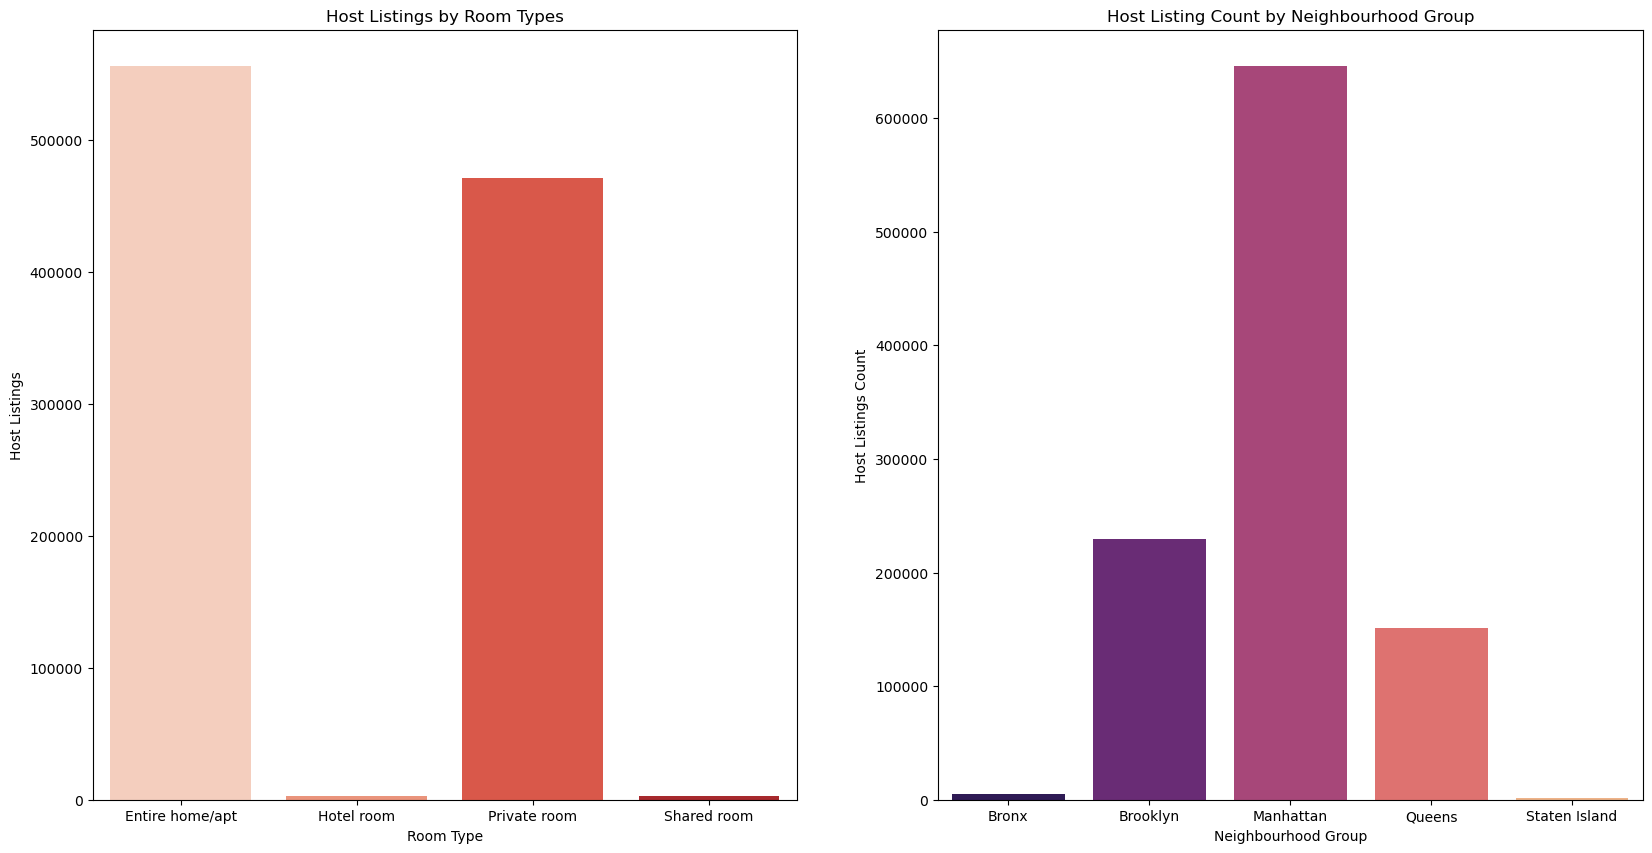

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

sns.barplot(data = df_room_list,
            x = df_room_list['Room Type'],
            y = df_room_list['Listings'],
            ax = ax1, label = "Hosting Listings Count by Room Types",
            palette = "Reds")

ax1.set_title("Host Listings by Room Types")
ax1.set_ylabel("Host Listings")

sns.barplot(data = df_neighb_list,
            x = df_neighb_list['Neighborhood Group'],
            y = df_neighb_list['Listings'],
            ax = ax2, label = "Host Listings Count by Neighbourhood groups",
            palette = "magma")

ax2.set_title("Host Listing Count by Neighbourhood Group")
ax2.set_xlabel("Neighbourhood Group")
ax2.set_ylabel("Host Listings Count")

# 2. Price Distribution by Room Types and Neighborhood Groups

<Axes: xlabel='room_type', ylabel='price'>

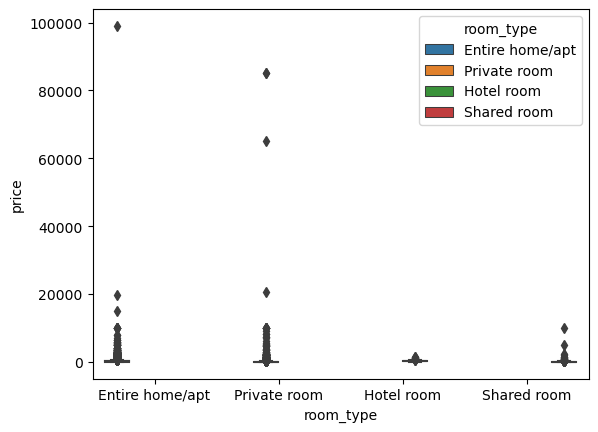

In [23]:
#Price Distribution by Room Type
sns.boxplot(data = df, x = df['room_type'], y = df['price'], hue = df['room_type'])

<Axes: xlabel='neighbourhood_group', ylabel='price'>

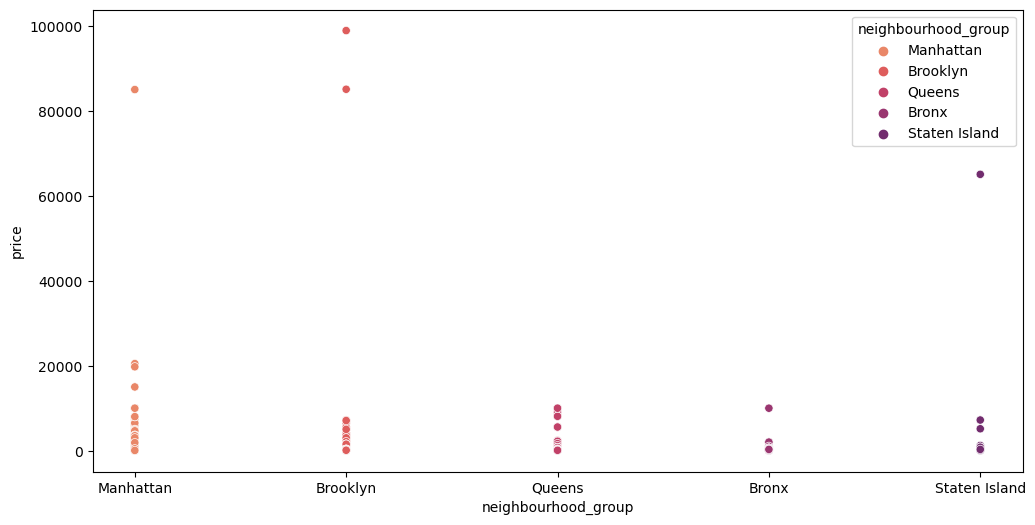

In [24]:
#Price Distribution by Neighborhood Groups
plt.figure(figsize = (12,6))
sns.scatterplot(data = df,
               x = df['neighbourhood_group'],
               y = df['price'],
               hue = df['neighbourhood_group'],
               palette = 'flare')

In [25]:
#Geographical Map
location = df[['latitude', 'longitude', 'neighbourhood_group']]
location

,latitude,longitude,neighbourhood_group
0,40.753560,-73.985590,Manhattan
1,40.685350,-73.955120,Brooklyn
2,40.803800,-73.967510,Manhattan
3,40.764570,-73.983170,Manhattan
4,40.662650,-73.994540,Brooklyn
...,...,...,...
42926,40.718976,-73.963985,Brooklyn
42927,40.721703,-73.981473,Manhattan
42928,40.688700,-73.907650,Brooklyn
42929,40.616911,-74.164652,Staten Island


# 3. Geographical Map for Listings by Neighborhood Group

Text(0, 0.5, 'Latitude')

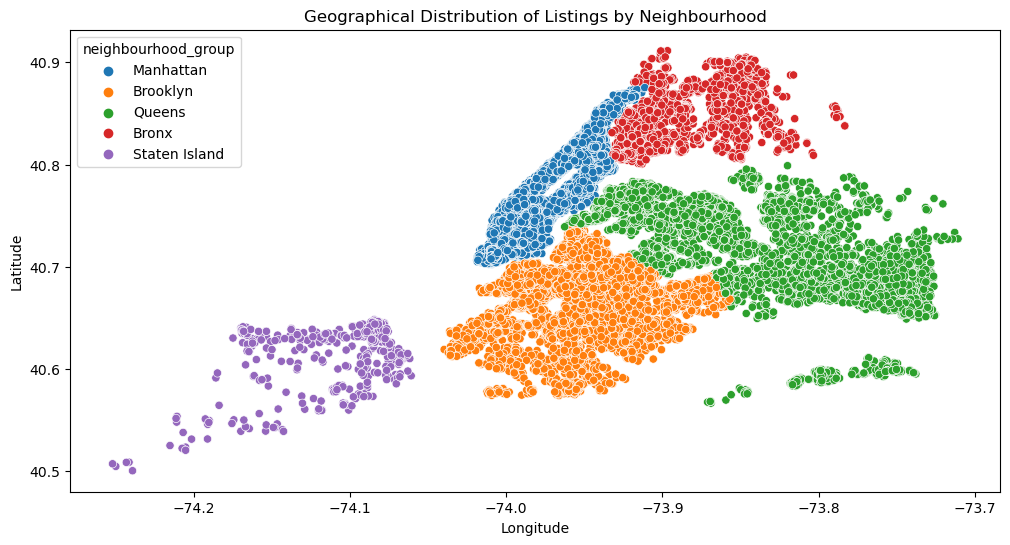

In [26]:
plt.figure(figsize = (12,6))
geo_map = sns.scatterplot(location, x = "longitude", y = "latitude", hue = "neighbourhood_group",
                          color = 'viridis')

plt.title("Geographical Distribution of Listings by Neighbourhood")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# 4. Price Distribution by Room Type and Neighborhood Group

In [27]:
#Mean Price Distribution by Neighborhood Groups and Room Types
av_price_room = df.groupby("room_type")["price"].mean()
df_av_room = pd.DataFrame(av_price_room).reset_index()
column_names = ["Room Type", "Price"]
df_av_room.columns = column_names
df_av_room

,Room Type,Price
0,Entire home/apt,249.255365
1,Hotel room,309.959391
2,Private room,134.696234
3,Shared room,126.250000


In [28]:
av_price_neighb = df.groupby("neighbourhood_group")["price"].mean()
df_av_neighb = pd.DataFrame(av_price_neighb).reset_index()
column_names = ["Neighbourhood Group", "Price"]
df_av_neighb.columns = column_names
df_av_neighb

,Neighbourhood Group,Price
0,Bronx,117.512123
1,Brooklyn,162.766829
2,Manhattan,268.118540
3,Queens,128.173655
4,Staten Island,309.037296


Text(0, 0.5, 'Average Price')

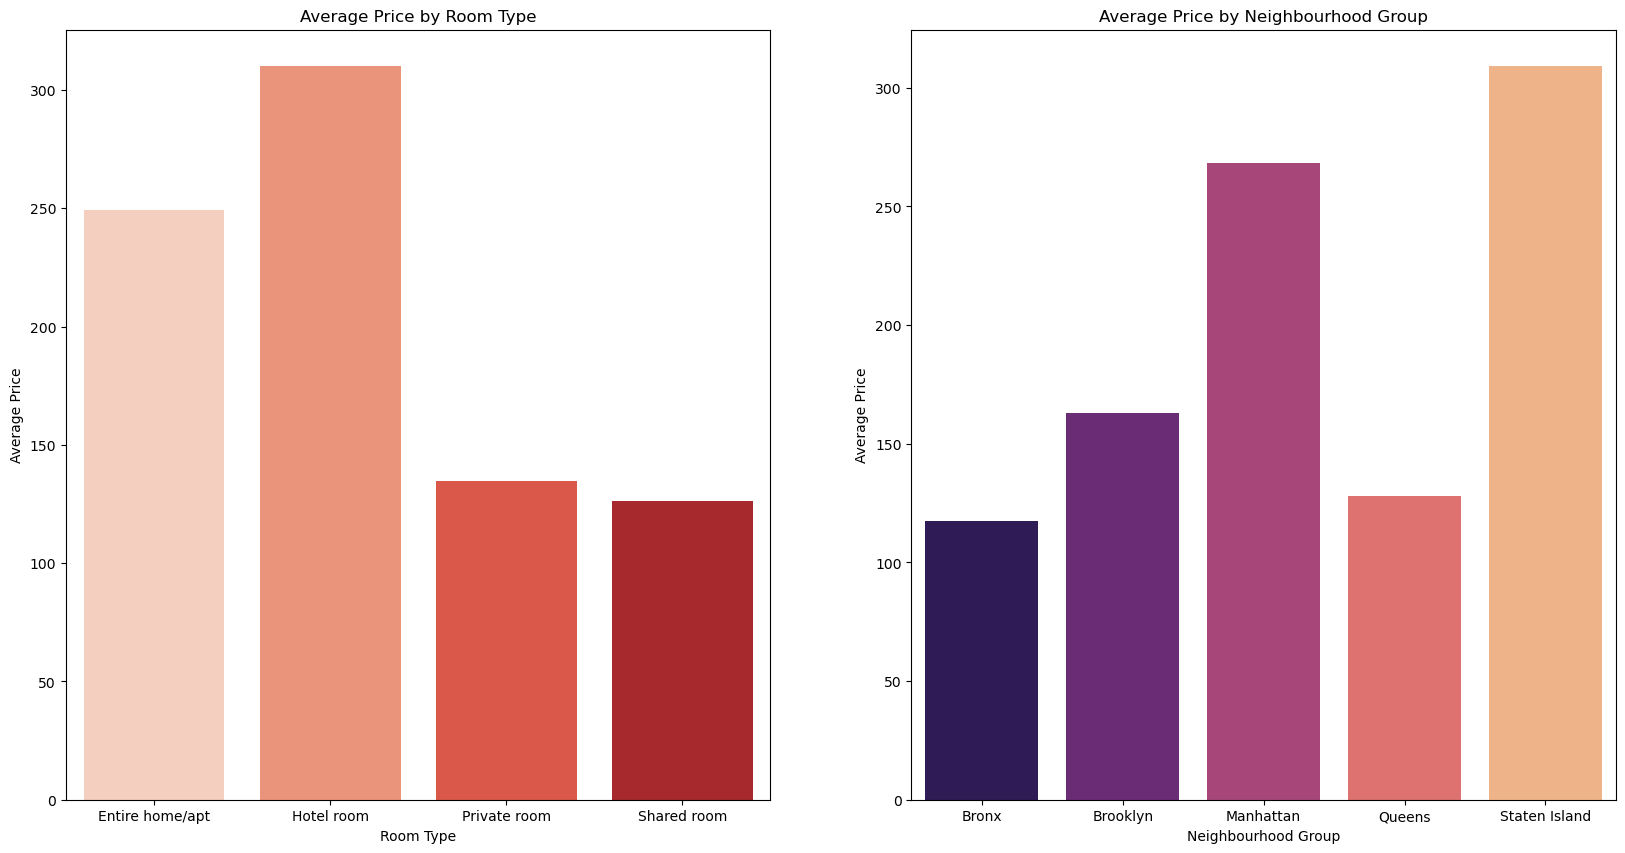

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

sns.barplot(data = df_av_room, x = df_av_room["Room Type"],
            y = df_av_room["Price"], 
            ax = ax1, palette="Reds",
            label="Average Price by Room Type")

ax1.set_title("Average Price by Room Type")
ax1.set_ylabel("Average Price")

sns.barplot(data = df_av_neighb, x = "Neighbourhood Group", y = "Price", 
            ax = ax2, palette = "magma",
            label = "Average Price by Neighbourhood Group")

ax2.set_title("Average Price by Neighbourhood Group")
ax2.set_xlabel("Neighbourhood Group")
ax2.set_ylabel("Average Price")

# 5. Number of Reviews by Room Type and Neighborhood Group

In [30]:
#Number of Reviews by Room Type and Neighborhood Group
rev_room_type = df.groupby("room_type")["number_of_reviews"].sum()
df_rev_room_type = pd.DataFrame(rev_room_type).reset_index()
column_names = ["Room Type", "Number of Reviews"]
df_rev_room_type.columns = column_names
df_rev_room_type

,Room Type,Number of Reviews
0,Entire home/apt,645605
1,Hotel room,10292
2,Private room,442186
3,Shared room,11940


In [31]:
rev_neighb = df.groupby("neighbourhood_group")["number_of_reviews"].sum()
df_rev_neighb = pd.DataFrame(rev_neighb).reset_index()
column_names = ["Neighbourhood Group", "Number of Reviews"]
df_rev_neighb.columns = column_names
df_rev_neighb

,Neighbourhood Group,Number of Reviews
0,Bronx,43047
1,Brooklyn,466643
2,Manhattan,376780
3,Queens,208344
4,Staten Island,15209


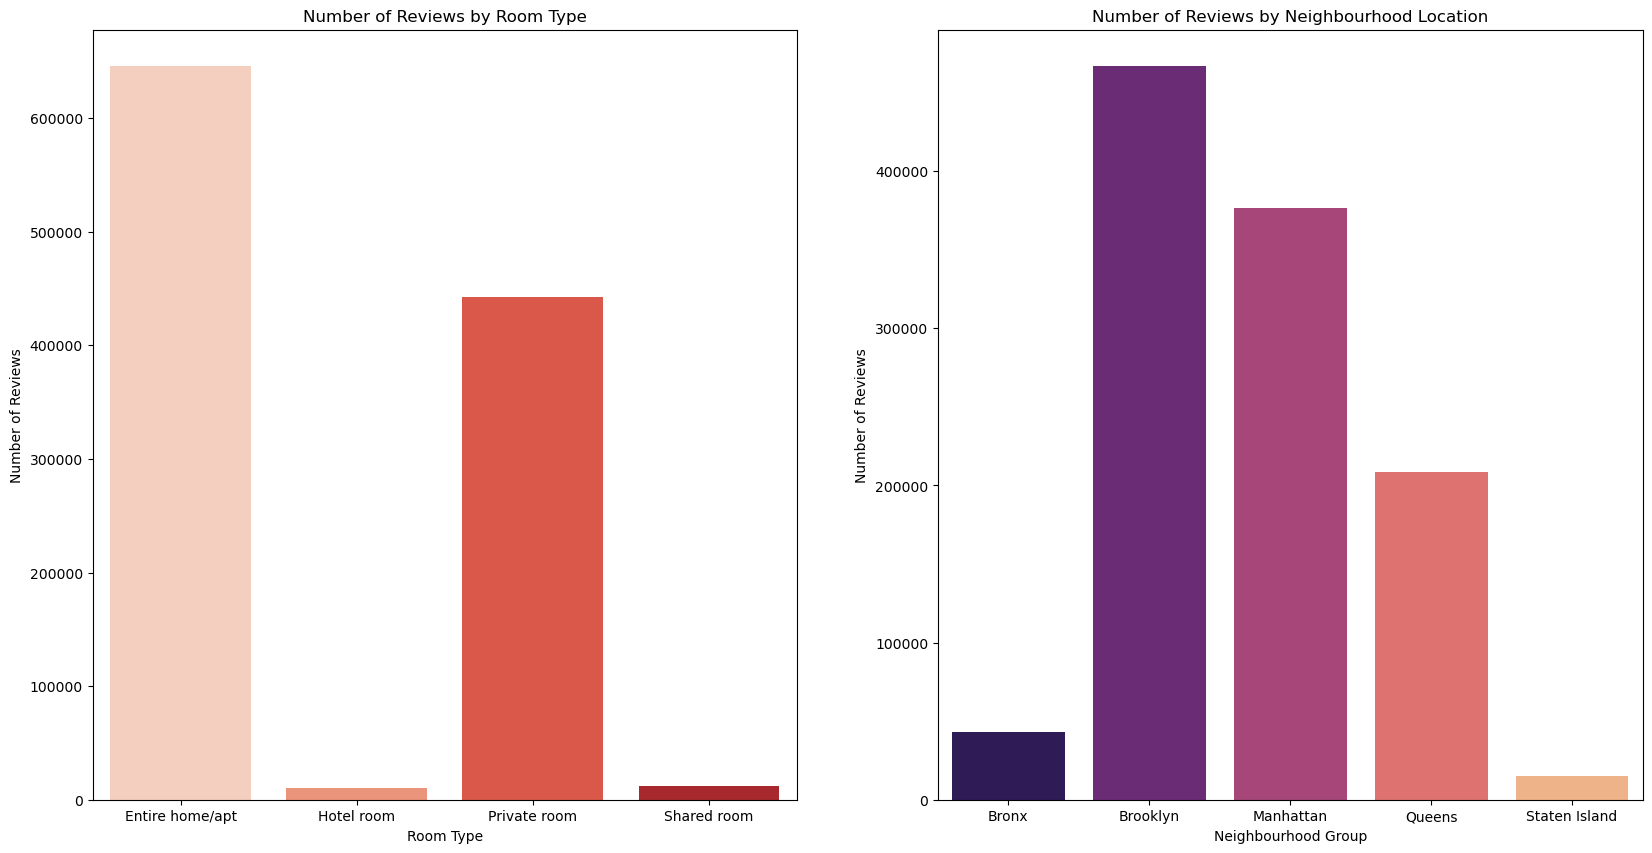

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(data = df_rev_room_type, x = "Room Type", y = "Number of Reviews", ax = ax1, palette = "Reds")
ax1.set_title("Number of Reviews by Room Type")

sns.barplot(data=df_rev_neighb, x="Neighbourhood Group", y="Number of Reviews", ax = ax2, palette = "magma")
ax2.set_title("Number of Reviews by Neighbourhood Location")
            
plt.show()

# 6. Total Bookings by Room Type and Neighborhood Group 

In [33]:
total_bookings = df.groupby("room_type")["name"].count()
df_total_bookings = pd.DataFrame(total_bookings).reset_index()
column_names_4 = ["Room Type", "Total Bookings"]
df_total_bookings.columns = column_names_4
df_total_bookings

,Room Type,Total Bookings
0,Entire home/apt,24274
1,Hotel room,197
2,Private room,17863
3,Shared room,575


In [34]:
total_bookings = df.groupby("neighbourhood_group")["name"].count()
df_total_bookings = pd.DataFrame(total_bookings).reset_index()
column_names_3 = ["Neighborhood Group", "Total Bookings"]
df_total_bookings.columns = column_names_3
df_total_bookings

,Neighborhood Group,Total Bookings
0,Bronx,1689
1,Brooklyn,16234
2,Manhattan,17641
3,Queens,6916
4,Staten Island,429


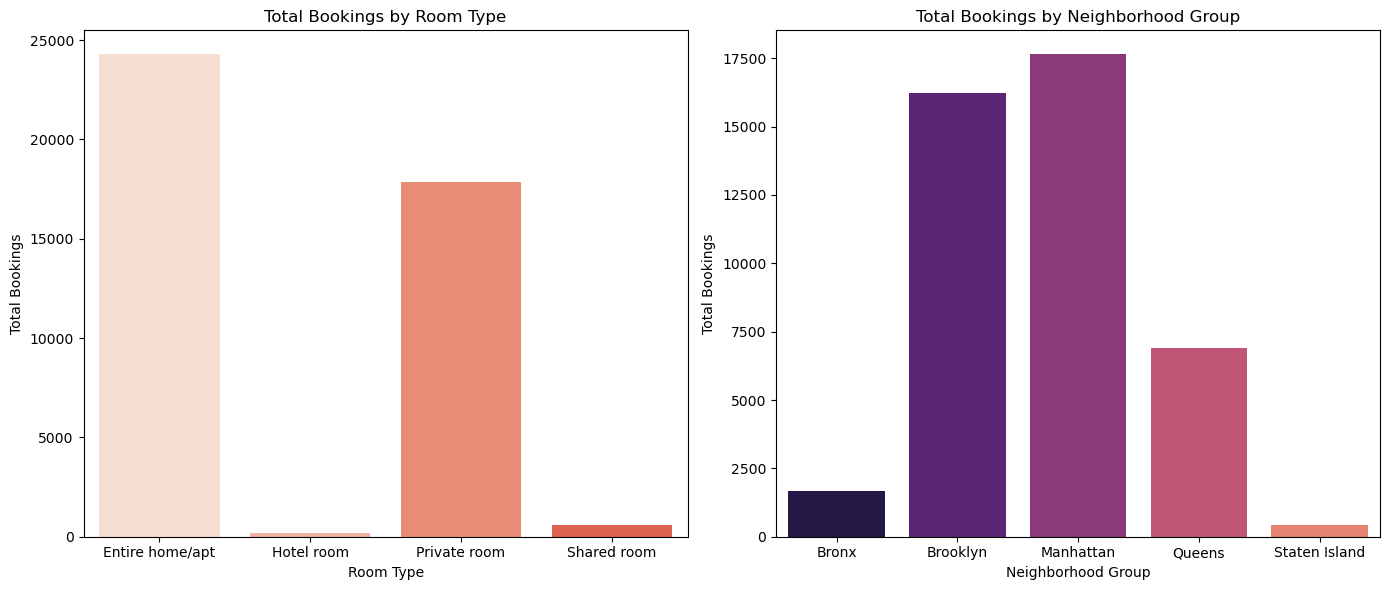

In [35]:
# Dataframe for Total Bookings based on Room Type
total_bookings_room_type = df.groupby("room_type")["name"].count()
df_total_bookings_room_type = pd.DataFrame(total_bookings_room_type).reset_index()
column_names_room_type = ["Room Type", "Total Bookings"]
df_total_bookings_room_type.columns = column_names_room_type

# Dataframe for Total Bookings based on Neighborhood Group
total_bookings_neighbourhood = df.groupby("neighbourhood_group")["name"].count()
df_total_bookings_neighbourhood = pd.DataFrame(total_bookings_neighbourhood).reset_index()
column_names_neighbourhood = ["Neighborhood Group", "Total Bookings"]
df_total_bookings_neighbourhood.columns = column_names_neighbourhood

# Color Palette Set
sns.set_palette('Reds')

# Making subplot for Room Type
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Room Type', y='Total Bookings', data=df_total_bookings_room_type)
plt.xlabel('Room Type')
plt.ylabel('Total Bookings')
plt.title('Total Bookings by Room Type')

# Color Palette Set
sns.set_palette('magma')

# Making subplot for Neighborhood Group
plt.subplot(1, 2, 2)
sns.barplot(x='Neighborhood Group', y='Total Bookings', data=df_total_bookings_neighbourhood)
plt.xlabel('Neighborhood Group')
plt.ylabel('Total Bookings')
plt.title('Total Bookings by Neighborhood Group')

# Showing diagram
plt.tight_layout()
plt.show()

# 7. Total Reviews by Year

In [36]:
reviews_by_year = df.groupby("year")["number_of_reviews"].sum()
df_reviews_by_year = pd.DataFrame(reviews_by_year).reset_index()
column_names = ["Year", "Reviews by Year"]
df_reviews_by_year.columns = column_names
df_reviews_by_year

,Year,Reviews by Year
0,2011.0,36
1,2012.0,30
2,2013.0,162
3,2014.0,573
4,2015.0,2747
5,2016.0,7744
6,2017.0,11198
7,2018.0,17040
8,2019.0,37740
9,2020.0,68075


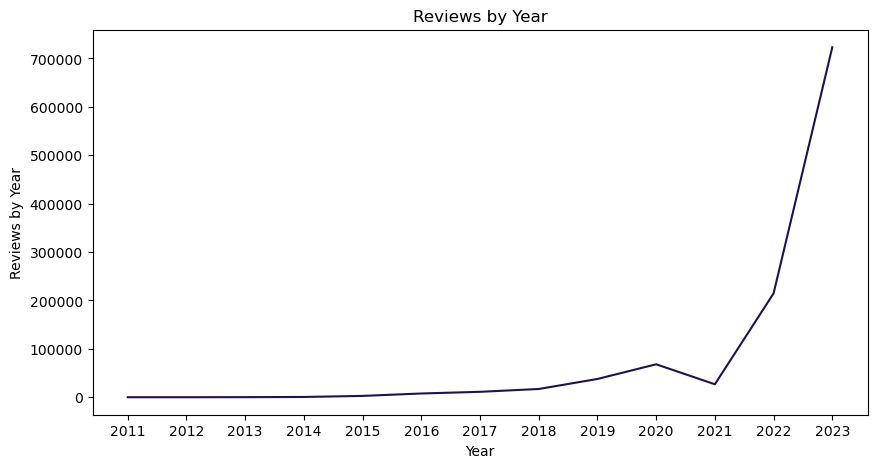

In [37]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=df_reviews_by_year, x="Year", y="Reviews by Year")
ax.set_xticks(list(range(2011, 2024)))
plt.rcParams["figure.figsize"] = (10, 4)
plt.title("Reviews by Year")
plt.show()

# 8. Price by Year

In [38]:
price_by_year = df.groupby("year")["price"].sum()
df_price_by_year = pd.DataFrame(price_by_year).reset_index()
column_names = ["Year", "Price by Year"]
df_price_by_year.columns = column_names
df_price_by_year

,Year,Price by Year
0,2011.0,844
1,2012.0,1696
2,2013.0,6430
3,2014.0,16068
4,2015.0,127204
5,2016.0,191224
6,2017.0,155581
7,2018.0,204155
8,2019.0,338396
9,2020.0,380013


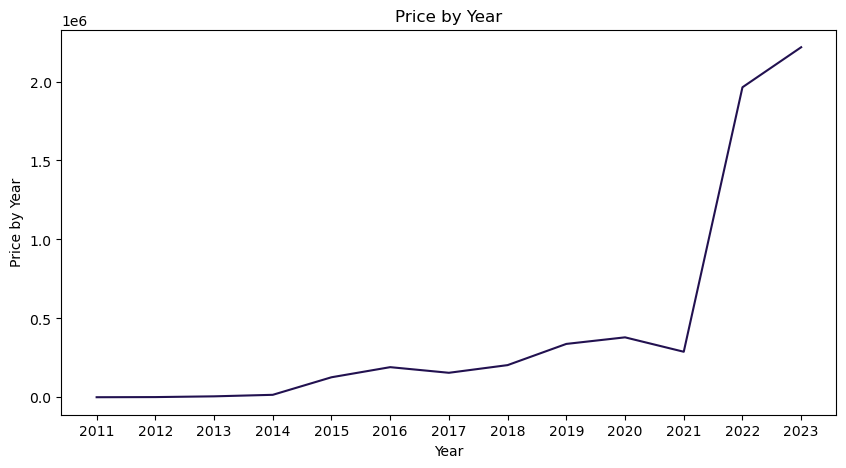

In [39]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=df_price_by_year, x="Year", y="Price by Year")
ax.set_xticks(list(range(2011, 2024)))
plt.rcParams["figure.figsize"] = (10, 4)
plt.title("Price by Year")
plt.show()

# 9. Total Bookings by Year

In [40]:
bookings_by_year = df.groupby("year")["name"].count()
df_bookings_by_year = pd.DataFrame(bookings_by_year).reset_index()
column_names = ["Year", "Total Bookings by Year"]
df_bookings_by_year.columns = column_names
df_bookings_by_year

,Year,Total Bookings by Year
0,2011.0,3
1,2012.0,12
2,2013.0,31
3,2014.0,102
4,2015.0,766
5,2016.0,1273
6,2017.0,1206
7,2018.0,1430
8,2019.0,2238
9,2020.0,2108


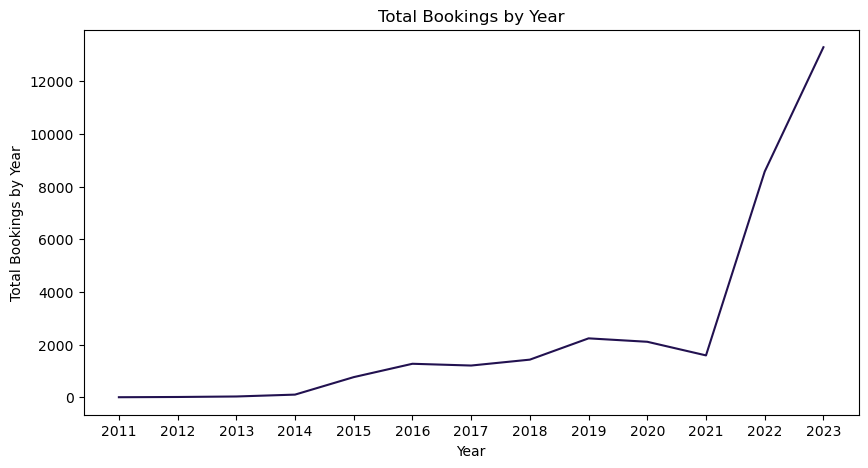

In [41]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=df_bookings_by_year, x="Year", y="Total Bookings by Year")
ax.set_xticks(list(range(2011, 2024)))
plt.rcParams["figure.figsize"] = (10, 4)
plt.title("Total Bookings by Year")
plt.show()

# 10. Host Listings by Year

In [42]:
host_year = df.groupby("year")["calculated_host_listings_count"].sum()
df_host_year = pd.DataFrame(host_year).reset_index()
column_names = ["Year", "Host Listings"]
df_host_year.columns = column_names
df_host_year

,Year,Host Listings
0,2011.0,32
1,2012.0,16
2,2013.0,33
3,2014.0,112
4,2015.0,898
5,2016.0,1764
6,2017.0,2238
7,2018.0,2855
8,2019.0,12653
9,2020.0,19224


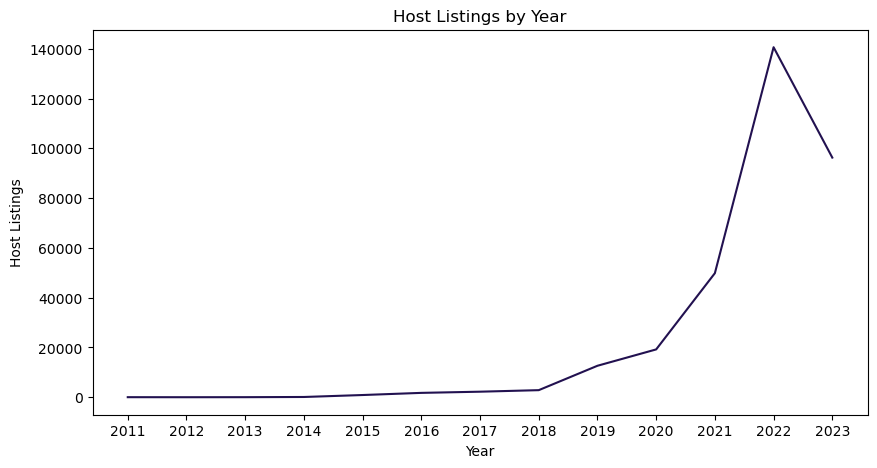

In [43]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=df_host_year, x="Year", y="Host Listings")
ax.set_xticks(list(range(2011, 2024)))
plt.title("Host Listings by Year")
plt.show()

# 11. Top 5 Listings by Host Name

In [44]:
host_list = df.groupby("host_name")["calculated_host_listings_count"].sum()
df_host_list = pd.DataFrame(host_list.nlargest(5)).reset_index()
column_names = ["Name", "Host Listings"]
df_host_list.columns = column_names
df_host_list

,Name,Host Listings
0,Blueground,276676
1,Eugene,155242
2,RoomPicks,127313
3,June,49300
4,Hiroki,42849


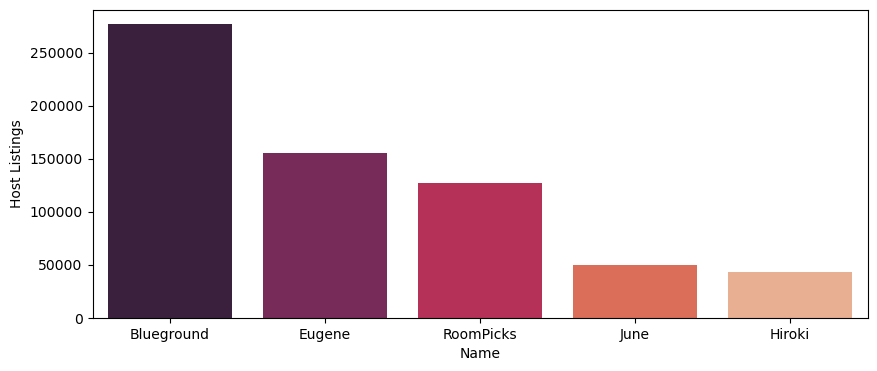

In [45]:
bar_host_list = sns.barplot(data = df_host_list,
                            x = df_host_list['Name'],
                            y = df_host_list['Host Listings'],
                            palette = "rocket")

# 12. Availability Rooms by Room Type and Neighborhood Group

In [46]:
room_365 = df.groupby("room_type")["availability_365"].sum()
df_room_365 = pd.DataFrame(room_365).reset_index()
column_names = ["Room Type", "Availability"]
df_room_365.columns = column_names
df_room_365

,Room Type,Availability
0,Entire home/apt,3468510
1,Hotel room,40942
2,Private room,2417111
3,Shared room,93359


In [47]:
room_365 = df.groupby("neighbourhood_group")["availability_365"].sum()
df_room_365 = pd.DataFrame(room_365).reset_index()
column_names = ["Neighborhood Group", "Availability"]
df_room_365.columns = column_names
df_room_365

,Neighborhood Group,Availability
0,Bronx,353333
1,Brooklyn,2039107
2,Manhattan,2343441
3,Queens,1193771
4,Staten Island,90270


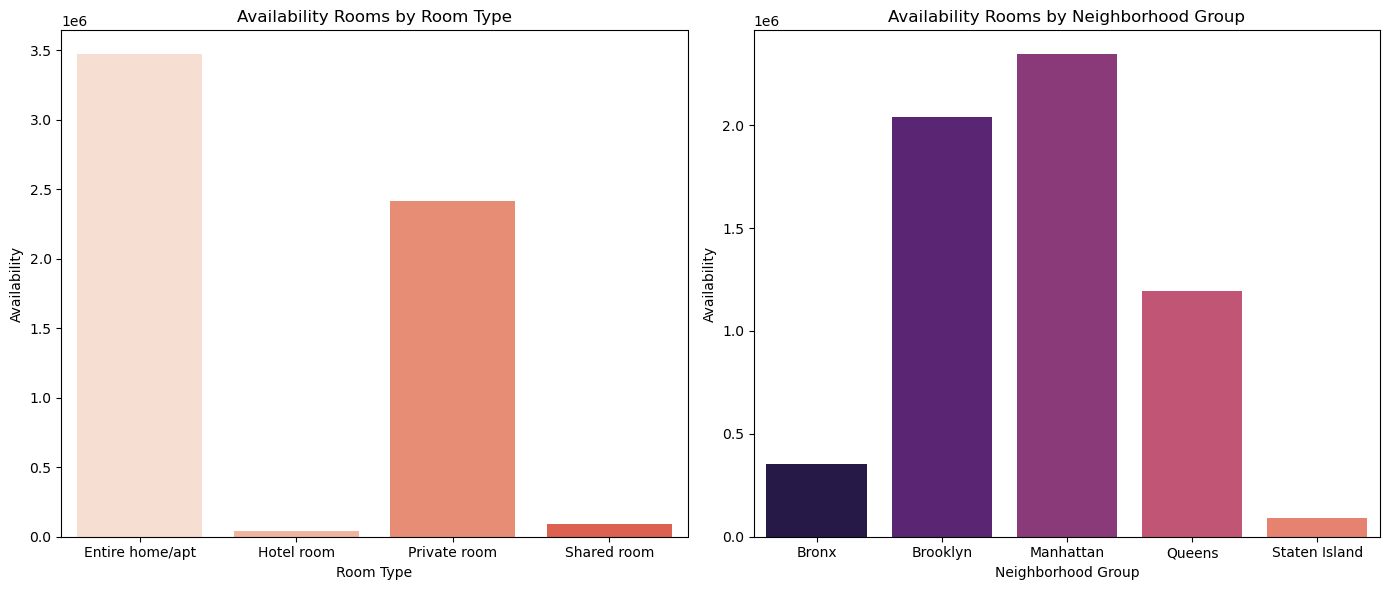

In [48]:
# Dataframe for Availability Rooms based on Room Type
room_365 = df.groupby("room_type")["availability_365"].sum()
df_room_365 = pd.DataFrame(room_365).reset_index()
column_names_room_365 = ["Room Type", "Availability"]
df_room_365.columns = column_names_room_365

# Dataframe for Availability based on Neighborhood Group
room_365_neighborhood = df.groupby("neighbourhood_group")["availability_365"].sum()
df_room_365_neighborhood = pd.DataFrame(room_365_neighborhood).reset_index()
column_names_neighborhood = ["Neighborhood Group", "Availability"]
df_room_365_neighborhood.columns = column_names_neighborhood

# Color Palette Set
sns.set_palette('Reds')

# Making subplot for Room Type
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Room Type', y='Availability', data=df_room_365)
plt.xlabel('Room Type')
plt.ylabel('Availability')
plt.title('Availability Rooms by Room Type')

# Color Palette Set
sns.set_palette('magma')

# Making subplot for Neighborhood Group
plt.subplot(1, 2, 2)
sns.barplot(x='Neighborhood Group', y='Availability', data=df_room_365_neighborhood)
plt.xlabel('Neighborhood Group')
plt.ylabel('Availability')
plt.title('Availability Rooms by Neighborhood Group')

# Showing diagram
plt.tight_layout()
plt.show()

# Heatmap Correlation

In [49]:
corr_table = df[['price','minimum_nights','number_of_reviews','reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()
corr_table

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.020675,-0.016406,-0.009522,0.026185,0.027153,-0.008535
minimum_nights,-0.020675,1.000000,-0.138867,-0.240618,0.119949,-0.092412,-0.216611
number_of_reviews,-0.016406,-0.138867,1.000000,0.610516,-0.111158,0.046174,0.652936
reviews_per_month,-0.009522,-0.240618,0.610516,1.000000,-0.120731,0.138872,0.858727
calculated_host_listings_count,0.026185,0.119949,-0.111158,-0.120731,1.000000,0.126450,-0.097346
availability_365,0.027153,-0.092412,0.046174,0.138872,0.126450,1.000000,0.122662
number_of_reviews_ltm,-0.008535,-0.216611,0.652936,0.858727,-0.097346,0.122662,1.000000


<Axes: >

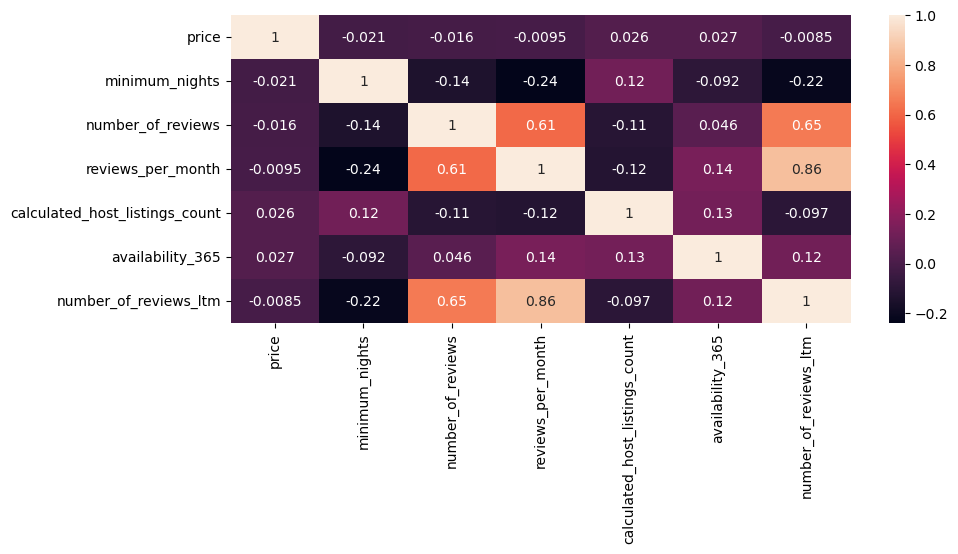

In [50]:
heat_map = sns.heatmap(data = corr_table, annot = True)
heat_map